# Úvod do DEAP (Distributed Evolutionary Algorithms in Python)

instalace v terminálu pomocí 

conda install -c conda-forge deap 

In [1]:
import numpy as np

import random

from deap import base, creator, tools, algorithms



## Vytváření nových typů
---

### Fitness
params: název, objekt fitness, -1.0 minimalizace / 1.0 maximalizace

In [22]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

/Users/jakubstudnicka/.venv/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


### Individua
params: název, třída datové struktury, fitness dle existující zaregistrované

budeme pracovat s listy (jde i numpy pole ale pozor na views!)

existuje celá řada typů: permutace, stromy, atd.

In [23]:
creator.create("Individual", list, fitness=creator.FitnessMax)

/Users/jakubstudnicka/.venv/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [24]:
toolbox = base.Toolbox()

toolbox.register("attr_float", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_float, n=10)
#toolbox.register("individual", initind, IND_LEN)  # název, funkce, poporade parametry krmici funkci

In [25]:
ind1 = toolbox.individual()
print(ind1)
ind1[1]

[0, 1, 0, 1, 1, 0, 1, 0, 1, 0]


1

In [26]:
ind1.fitness.values


()

### Populace

In [27]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# init repeat opakuje dle parametru za ni, tedy dela list individui dle zakladni inicializace individua


In [28]:
pop = toolbox.population(n=10)
print(pop)

[[0, 1, 0, 1, 1, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 1, 1, 1, 1, 0, 1], [1, 0, 0, 0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 1, 1, 1, 0, 1], [0, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 1, 1, 0, 1, 0, 0, 0, 1, 1], [0, 0, 1, 1, 1, 0, 0, 0, 1, 0]]


## Fitness
---
Tuto funkci si musíme napsat sami !!!

In [29]:
def evaluate(individual):
    return sum(individual),    # !!!! vracíme n-tici, proto ta čárka

In [30]:
toolbox.register("evaluate", evaluate)

## Operátory
---

sada operátorů lze nalézt v [dokumentaci](https://deap.readthedocs.io/en/master/api/tools.html#module-deap.tools)

In [31]:
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=1, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

## Jednoduchý algoritmus
---

In [35]:
# hlavní parametry vystrčené kvůli experimentování

NGEN = 50            # počet generací
CXPB = 0.01           # pravděpodobnost crossoveru na páru
MUTPB = 0.2         # pravděpodobnost mutace jedince

finalpop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN)


gen	nevals
0  	0     
1  	2     
2  	1     
3  	2     
4  	2     
5  	4     
6  	2     
7  	1     
8  	1     
9  	4     
10 	1     
11 	6     
12 	1     
13 	0     
14 	3     
15 	4     
16 	0     
17 	2     
18 	2     
19 	4     
20 	1     
21 	2     
22 	1     
23 	1     
24 	4     
25 	2     
26 	3     
27 	0     
28 	2     
29 	1     
30 	2     
31 	1     
32 	2     
33 	3     
34 	2     
35 	3     
36 	4     
37 	1     
38 	2     
39 	3     
40 	1     
41 	3     
42 	2     
43 	0     
44 	2     
45 	2     
46 	3     
47 	4     
48 	2     
49 	3     
50 	1     


## Statistika
---

In [36]:
import numpy as np

s = tools.Statistics(key=lambda ind: ind.fitness.values)
s.register("mean", np.mean)
s.register("max", np.max)


hof = tools.HallOfFame(1)  # pamatuje si 1 nejlepšího jedince za historii evoluce (i když zanikne)

pop = toolbox.population(n=10)


finalpop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=s, halloffame=hof)

gen	nevals	mean	max
0  	10    	5.1 	8  
1  	2     	6.3 	8  
2  	0     	7.2 	8  
3  	4     	7.5 	9  
4  	1     	7.9 	8  
5  	0     	8   	8  
6  	3     	7.9 	8  
7  	2     	8   	8  
8  	1     	8   	8  
9  	1     	8   	8  
10 	2     	8   	8  
11 	1     	8.1 	9  
12 	0     	8.4 	9  
13 	4     	9   	9  
14 	0     	9   	9  
15 	2     	9   	9  
16 	1     	9   	9  
17 	4     	9   	9  
18 	3     	8.9 	9  
19 	3     	9   	9  
20 	6     	8.9 	9  
21 	4     	9   	9  
22 	1     	8.9 	9  
23 	2     	8.9 	9  
24 	1     	9   	9  
25 	2     	9   	9  
26 	1     	9   	9  
27 	1     	9   	9  
28 	3     	9   	9  
29 	3     	9   	9  
30 	1     	9   	9  
31 	0     	9   	9  
32 	0     	9   	9  
33 	2     	8.8 	9  
34 	2     	9   	9  
35 	2     	9.1 	10 
36 	4     	9.2 	10 
37 	1     	9.6 	10 
38 	1     	10  	10 
39 	2     	10  	10 
40 	0     	10  	10 
41 	2     	10  	10 
42 	1     	10  	10 
43 	1     	10  	10 
44 	2     	10  	10 
45 	0     	10  	10 
46 	1     	9.9 	10 
47 	0     	10  	10 
48 	0     	10  	10 


In [37]:
mean, maximum = logbook.select("mean", "max")


print(hof)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


## Kreslení statistiky
---

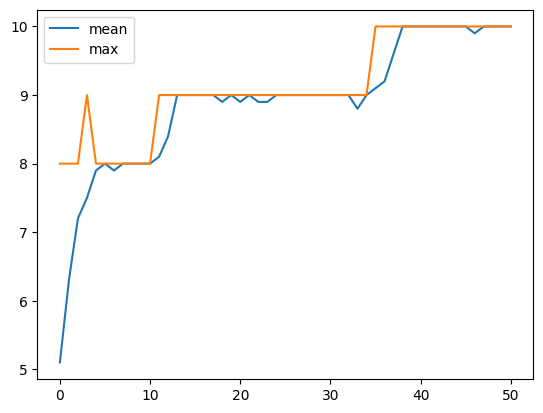

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(range(NGEN+1), mean, label="mean")     # 0.tá generace zvlášť
ax.plot(range(NGEN+1), maximum, label="max")

ax.legend()

## Aplikace na barvení grafu
---

### Načtení dat

In [ ]:
import numpy as np
import networkx as nx



# funkce pro nacitani grafu z Dimacs formatu
def readdimacs(filename):

    file = open(filename, 'r')
    lines = file.readlines()

    Gd = nx.Graph()

    for line in lines:
        if line[0] == "e":
            vs = [int(s) for s in line.split() if s.isdigit()]
            Gd.add_edge(vs[0]-1, vs[1]-1)   # dimacs cisluje vrcholy od 1
    return Gd

Gd = nx.Graph()
Gd = readdimacs('dsjc125.1.txt')




### Definice GA

In [ ]:

COLNUM = 10 # počet barev

N = Gd.number_of_nodes()

creator.create("FitnessMax", base.Fitness, weights=(-1.0,))  # minimalizujeme počet kolizí

creator.create("Individual", list, fitness=creator.FitnessMax)


toolbox = base.Toolbox()

toolbox.register("attr_float", random.randint, 0, COLNUM)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_float, n=N)


toolbox.register("population", tools.initRepeat, list, toolbox.individual)


# vrací celkový počet kolizí
def evaluate(individual):

    collisions = 0

    for i in range(N-1):
        for j in range(i, N):
            if Gd.has_edge(i, j):
                if individual[i] == individual[j]:
                    collisions += 1
    return collisions, # !!!! vracíme n-tici, proto ta čárka


toolbox.register("evaluate", evaluate)


toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=COLNUM, indpb=0.01)
toolbox.register("select", tools.selTournament, tournsize=2)



NGEN = 150          # počet generací
CXPB = 0.5           # pravděpodobnost crossoveru na páru
MUTPB = 0.7         # pravděpodobnost mutace



s = tools.Statistics(key=lambda ind: ind.fitness.values)
s.register("mean", np.mean)
s.register("min", np.min)

pop = toolbox.population(n=100)


finalpop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=s)

### Vykreslení fitness

In [ ]:
mean, minimum = logbook.select("mean", "min")

fig, ax = plt.subplots()

ax.plot(range(NGEN+1), mean, label="mean")     # 0.tá generace zvlášť
ax.plot(range(NGEN+1), minimum, label="min")
ax.legend()